# **Проект: вариант 3**

#### Дейтинговое приложение. 
>  Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

#### **Требуется проверить:**

+ Был ли эксперимент успешен.
+ Проанализировать, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.

** Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.*

### Данные

##### Всего есть три группы: 
1. тестовая (test), 
2. контрольная 1 (control_1) 
3. контрольная 2 (control_2). Для каждой из них:

##### users_*.csv – информация о пользователях:

+ uid – идентификатор пользователя
+ age – возраст
+ attraction_coeff – коэффициент привлекательности 
+ coins – число монеток (внутренняя валюта)
+ country – страна  
+ visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
+ gender – пол
+ age_filter_start  – фильтр поиска, мин. значение 
+ age_filter_end  – фильтр поиска, макс. значение 
+ views_count – число полученных оценок 
+ was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
+ is_premium –  является ли премиум
+ total_revenue – нормированная выручка
 
##### transactions_*.csv – информация о платежах пользователей:

+ uid – идентификатор пользователя
+ country – страна
+ joined_at – дата и время регистрации
+ paid_at – дата и время покупки
+ revenue – нормированная выручка
+ payment_id – идентификатор платежа
+ from_page – откуда пользователь перешел на страницу оплаты
+ product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, 
+ coins – подписка за внутреннюю валюту, other_type – другое)

Импорт нужных библиотек

In [251]:
import pandas as pd

from scipy.stats import chi2_contingency, chi2 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm.auto import tqdm
from scipy import stats
from scipy.stats import norm, mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import f_oneway

Загрузка всех данных

In [252]:
ut = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-volkov-23/2_data/data_final_project/Проект_3_users_test.csv', sep=';')
uc_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-volkov-23/2_data/data_final_project/Проект_3_users_control_1.csv', sep=';')
uc_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-volkov-23/2_data/data_final_project/Проект_3_users_control_2.csv', sep=';')

tt = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-volkov-23/2_data/data_final_project/Проект_3_transactions_test.csv', sep=';')
tc_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-volkov-23/2_data/data_final_project/Проект_3_transactions_control_1.csv', sep=';')
tc_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-volkov-23/2_data/data_final_project/Проект_3_transactions_control_2.csv', sep=';')

Проверим количество строк в группах

In [253]:
print('Пользователи')
print('В тестовой группе', ut.shape[0], 'строк')
print('В первой контрольной группе', uc_1.shape[0], 'строк')
print('Во второй контрольной группе', uc_2.shape[0], 'строк')
print('Транзакции')
print('В тестовой группе', tt.shape[0], 'строк')
print('В первой контрольной группе', tc_1.shape[0], 'строк')
print('Во второй контрольной группе', tc_2.shape[0], 'строк')

Пользователи
В тестовой группе 4308 строк
В первой контрольной группе 4340 строк
Во второй контрольной группе 4264 строк
Транзакции
В тестовой группе 273 строк
В первой контрольной группе 1007 строк
Во второй контрольной группе 328 строк


Удаление дубликатов

In [254]:
ut = ut.drop_duplicates()
uc_1 = uc_1.drop_duplicates()
uc_2 = uc_2.drop_duplicates()
tt = tt.drop_duplicates()
tc_1 = tc_1.drop_duplicates()
tc_2 = tc_2.drop_duplicates()

In [255]:
 ut.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [256]:
uc_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [257]:
uc_2.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

Преобразуем Nan в '0'

In [258]:
ut = ut.fillna(0)
uc_1 = uc_1.fillna(0)
uc_2 = uc_2.fillna(0)
tc_1 = tc_1.fillna(0)

In [259]:
#преобразуем время в соответствующий тип данных для тестовой
tt.joined_at = pd.to_datetime(tt.joined_at)
tt.paid_at = pd.to_datetime(tt.paid_at)
# здесь присутствует ошибка в логах у уникальных id и payment_id добавлены лишние 0, можно изменить в них тип данных с float 
# на int64
tc_1 = tc_1.astype({'uid': 'int64'})
tc_1 = tc_1.astype({'payment_id': 'int64'})
#преобразуем время в соответствующий тип данных для контрольных групп.
tc_1.joined_at = pd.to_datetime(tc_1.joined_at)
tc_1.paid_at = pd.to_datetime(tc_1.paid_at)

tc_2.joined_at = pd.to_datetime(tc_2.joined_at)
tc_2.paid_at = pd.to_datetime(tc_2.paid_at)


In [260]:
tc_1 = tc_1.astype({'uid': 'int64'})
tc_1 = tc_1.astype({'payment_id': 'int64'})

In [261]:
# обозначимв данных тестируемые группы
tt['group'] = 'test'
tc_1['group'] = 'c1'
tc_2['group'] = 'c2'

ut['group'] = 'test'
uc_1['group'] = 'c1'
uc_2['group'] = 'c2'


In [262]:
# сделаем два датафрейма
# с данными о пользовательях
users = pd.concat([ut, uc_1, uc_2])
# с данными о транзакциях
transactions = pd.concat([tt, tc_1, tc_2])

In [263]:
users.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
group                object
dtype: object

In [264]:
transactions.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                float64
payment_id               int64
from_page               object
product_type            object
group                   object
dtype: object

In [265]:
users.shape

(12912, 14)

In [266]:
transactions.shape

(946, 9)

#### Теперь можно посмотреть на сами данные, проанализирать какие параметры можно отобрать для сравнения данных и в целом проверить репрезентативность выборок 
#### - проверим когда совершались транзакции

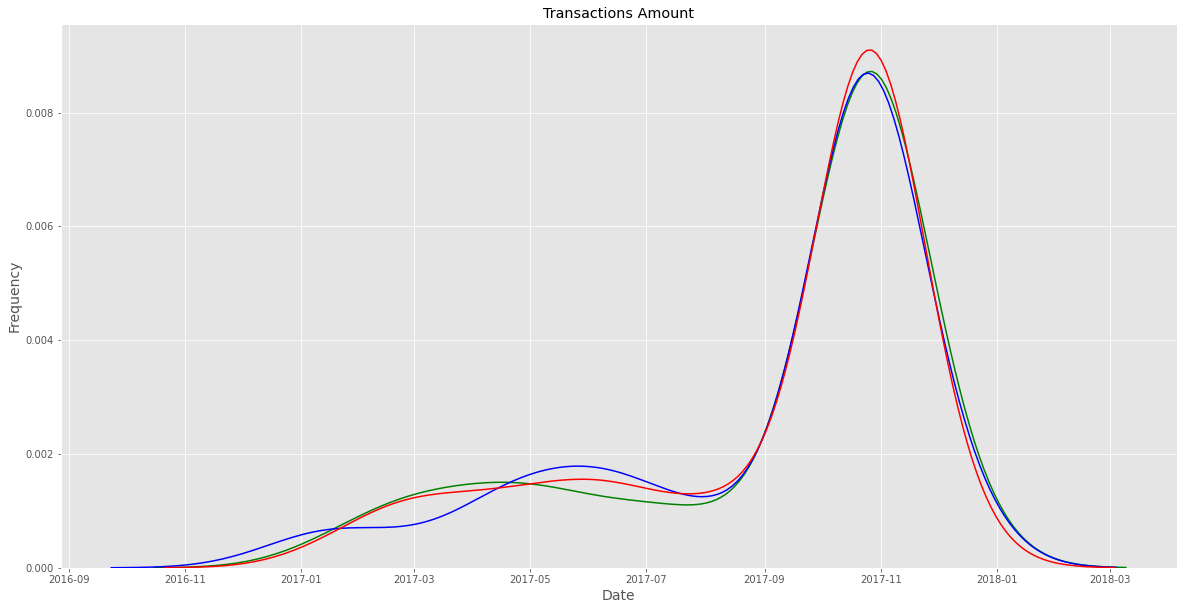

In [267]:
sns.kdeplot(data=transactions[(transactions['group'] == 'test' )], x = 'paid_at', shade=False, color='Green').set(title='Transactions Amount')
sns.kdeplot(data=transactions[(transactions['group'] == 'c1' )], x = 'paid_at', shade=False, color='Blue')
sns.kdeplot(data=transactions[(transactions['group'] == 'c2' )], x = 'paid_at', shade=False, color='Red')
plt.rcParams['figure.figsize']=(20,10)
sns.set_palette("deep")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
sns.set_palette("deep")

Исходя из графиков можно сделать вывод, что почти все транзакции были сделаны в одно и тоже время, каких либо выбросов не наблюдается

#### - посмотрим на распределение пользователей по возрасту

In [268]:
print('Минимальный возраст', users.age.min(), 'лет')
print('Максимальный возраст', users.age.max(), 'лет')

Минимальный возраст 16 лет
Максимальный возраст 99 лет


In [269]:
# для наглядности лучше разделить пользователей на возрастные категории
cut_bins = [0,25,35,45,100]
cut_labels_4 = ['16-25', '25-35','35-45', '45-100']
users['elderness'] = pd.cut(users['age'],
                       bins=cut_bins,
                       labels=cut_labels_4)
ages = pd.crosstab(users.elderness, users.group)
ages

group,c1,c2,test
elderness,,,
16-25,1318,1298,1305
25-35,1601,1627,1658
35-45,923,845,884
45-100,498,494,461


Выборки получились вполне репрезентативны, выбросов не замечено

In [270]:
# проведем тест по Критерию Краскела-Уоллиса, стат значимых различий не обнаружено.
stats.kruskal(ages['c1'], ages['c2'], ages['test'])

KruskalResult(statistic=0.1538461538461533, pvalue=0.9259610786423162)

#### - посмотрим на геоданные, как пользователи распределены в зависимости от региона.

In [271]:
print('Количество стран в тестовой группе:', users[(users['group'] == 'test')].country.nunique())
print('Количество стран в контрольной группе 1:', users[(users['group'] == 'c1')].country.nunique())
print('Количество стран в контрольной группе 2:', users[(users['group'] == 'c2')].country.nunique())
print('Всего стран учавствующих в тесте:', users.country.nunique())

Количество стран в тестовой группе: 51
Количество стран в контрольной группе 1: 40
Количество стран в контрольной группе 2: 45
Всего стран учавствующих в тесте: 72


In [272]:
fig = px.histogram(users[['country', 'group']], x='country', color='group')
fig.show()

Здесь уже не все так очевидно, присутствует большое количество стран где учавствуют пользователи только одной из выборок.

In [273]:
# найдем страны, где встречаются все три группы.
country = pd.crosstab(users.country, users.group)
country = country.query('c1 > 0 and c2 > 0 and test > 0')
country

group,c1,c2,test
country,,,
Argentina,389,397,396
Australia,50,51,62
Belgium,108,90,92
Canada,134,134,137
Chile,287,286,272
Colombia,1,2,1
Costa Rica,1,1,1
Dominican Republic,2,1,1
France,370,376,359


In [274]:
# проведем тест по Критерию Краскела-Уоллиса, стат значимых различий не обнаружено.
stats.kruskal(country['c1'], country['c2'], country['test'])

KruskalResult(statistic=0.02163365132943118, pvalue=0.989241465828392)

In [275]:
# отберем только те страны, которые есть во всем трех группах
users = users.query("country == 'Argentina' or country == 'Australia' or \
country == 'Belgium' or \
country == 'Canada' or \
country == 'Chile' or \
country == 'Colombia' or \
country == 'Costa Rica' or \
country == 'Dominican Republic' or \
country == 'France' or \
country == 'Germany' or \
country == 'India' or \
country == 'Israel' or \
country == 'Italy' or \
country == 'Kyrgyzstan' or \
country == 'Mexico' or \
country == 'Peru' or \
country == 'Portugal' or \
country == 'Russian Federation' or \
country == 'Spain' or \
country == 'Switzerland' or \
country == 'Turkey' or \
country == 'Ukraine' or \
country == 'United Arab Emirates' or \
country == 'United Kingdom (Great Britain)' or \
country == 'United States of America'")

#### - как распределяются пользователи по гендеру

In [276]:
#разобьем пользователей по гендеру
gender = pd.crosstab(users.gender, users.group)
gender

group,c1,c2,test
gender,,,
0,182,194,200
1,4137,4044,4071


In [277]:
# проведем тест по Критерию Краскела-Уоллиса, стат значимых различий не обнаружено.
stats.kruskal(gender['c1'], gender['c2'], gender['test'])

KruskalResult(statistic=0.2857142857142847, pvalue=0.8668778997501821)

Различий практически нет

#### - распределение трат пользователей 

In [278]:
# подготовим данные для бокс плота
revenue = transactions.groupby(['group', 'paid_at', 'product_type', 'uid'], as_index=False).agg({'revenue':'sum'})
revenue = revenue.assign(revenue_log = np.log(revenue.revenue))
revenue = revenue.pivot(index=['group', 'paid_at', 'uid'], columns='product_type', values='revenue').reset_index()

In [279]:
revenue_log = transactions.groupby(['group', 'paid_at', 'product_type', 'uid'], as_index=False).agg({'revenue':'sum'})
revenue_log = revenue_log.assign(revenue = np.log(revenue_log.revenue))
revenue_log = revenue_log.pivot(index=['group', 'paid_at', 'uid'], columns='product_type', values='revenue').reset_index()

In [280]:
# создадим сводную таблицу с медианными значениями по покупкам.
median_revenue = revenue.groupby('group', as_index=False).agg({'coins':'median', 
                                    'other_type':'median', 
                                    'premium_no_trial':'median', 
                                    'premium_no_trial':'median',
                                    'trial_premium':'median'})
median_revenue

,group,coins,other_type,premium_no_trial,trial_premium
0,c1,3952.0,3783.0,6292.0,12402.0
1,c2,2483.0,2730.0,6292.0,12727.0
2,test,3568.5,2743.0,7956.0,12746.5


In [281]:
# создадим сводную таблицу с средними значениями по покупкам.
mean_revenue = revenue.groupby('group', as_index=False).agg({'coins':'mean', 
                                    'other_type':'mean', 
                                    'premium_no_trial':'mean', 
                                    'premium_no_trial':'mean',
                                    'trial_premium':'mean'})
mean_revenue

,group,coins,other_type,premium_no_trial,trial_premium
0,c1,6058.000000,3841.500000,7492.875000,11533.134328
1,c2,3538.927928,2939.209302,7026.500000,12150.584906
2,test,5725.173469,5935.222222,10809.413333,12906.483871


1. По медианным значениям можно с уверенностью сказать, что цена на премиум подписку выросла!
2. По средним значениям в целом видно, что пользователи стали больше тратить денег.
- ***Трудно сказать хорошо это или плохо, пока не знаем конверсии***

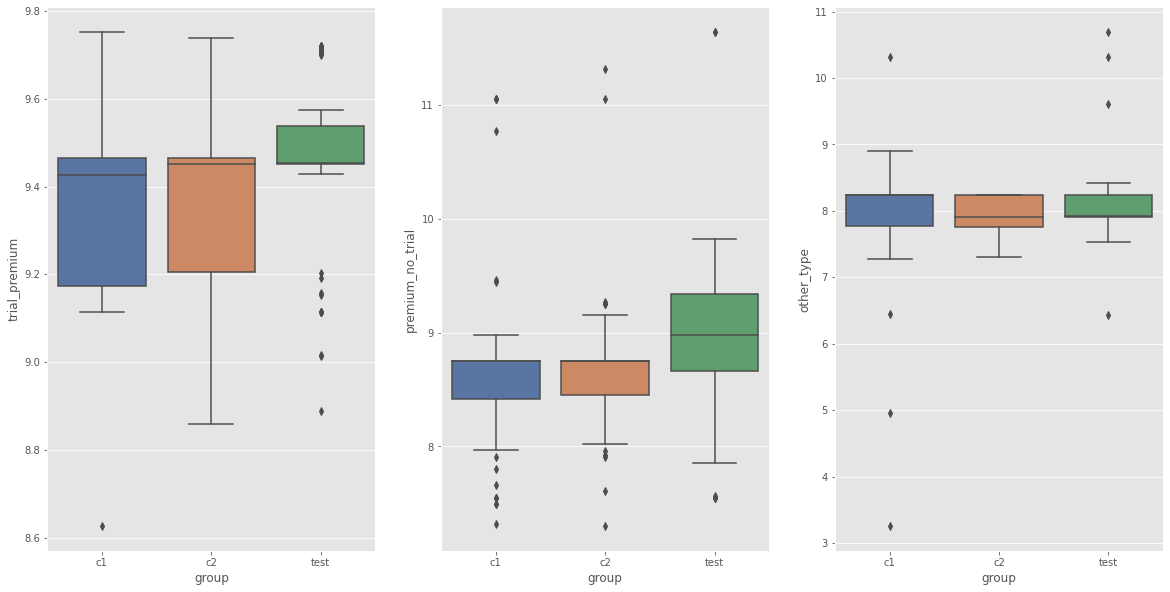

In [282]:
#сделаем графики бокс плота.
fig, axes = plt.subplots(1, 3)
sns.boxplot(x='group', y='trial_premium', data=revenue_log, ax=axes[0])
sns.boxplot(x='group', y='premium_no_trial', data=revenue_log, ax=axes[1])
sns.boxplot(x='group', y='other_type', data=revenue_log, ax=axes[2])
plt.rcParams['figure.figsize']=(20,5)

По бокс полтам видно, что медианы у пробной подписки почти не отличаются, зато у платной премиум подписки есть различия. А по другим транзакциям особых различий на графиках не видно.

- из предыдущего пункта видно, что есть выбросы, проверим пользователей на этот счет.

In [283]:
# среди пользователей есть один, который в сумме потратил в разы больше других пользователей.
users.sort_values(by='total_revenue', ascending=False).head(2)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,elderness
1427,892333905,22,175,3608.0,Italy,"1,2,3,4,5,6,7,15",1,19,25,575,1.0,1.0,486330,c1,16-25
3629,891178380,42,275,85.0,Spain,"1,2,4,5,6,7",1,26,36,287,1.0,1.0,129870,test,35-45


In [284]:
# на ошибку в логах это не похоже, скорее всего очень лояльный пользователь, но он может негативно влиять на результаты.
transactions.query('uid == 892333905')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
6,892333905,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610.0,19,gifts,coins,c1
13,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67,menu,other_type,c1
28,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783.0,67,empty_admins,other_type,c1
43,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67,empty_admins,other_type,c1
49,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783.0,67,menu,other_type,c1
63,892333905,Italy,2017-10-16 01:38:00,2017-10-16 22:35:00,31525.0,19,menu,coins,c1
76,892333905,Italy,2017-10-16 01:38:00,2017-10-16 18:42:00,31525.0,19,fans,coins,c1
126,892333905,Italy,2017-10-16 01:38:00,2017-10-16 22:39:00,19773.0,146,menu,coins,c1
137,892333905,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,31525.0,19,gifts,coins,c1
143,892333905,Italy,2017-10-16 01:38:00,2017-10-16 13:10:00,63037.0,147,no_sympathy,premium_no_trial,c1


In [285]:
#удалим этого пользователя из наблюдений
transactions = transactions.query('uid != 892333905')
users = users.query('uid != 892333905')

- посчитаем ARPPU 

In [286]:
ARPPU = transactions
# добавил колонку с подсчетом количества покупок для каждой группы.
ARPPU['sum_of_purchases'] = ARPPU.group.apply(lambda x: len(ARPPU[(ARPPU['group'] == 'c1')])\
                                              if x == 'c1'\
                                              else (len(ARPPU[(ARPPU['group'] == 'c2')]) if x == 'c2'\
                                                        else len(ARPPU[(ARPPU['group'] == 'test')])))

# добавил колонку с подсчетом количества клиентов для каждой группы.
ARPPU['sum_of_clients'] = ARPPU.group.apply(lambda x: len(ARPPU[(ARPPU['group'] == 'c1')].drop_duplicates('uid'))\
                                              if x == 'c1'\
                                              else (len(ARPPU[(ARPPU['group'] == 'c2')].drop_duplicates('uid')) if x == 'c2'\
                                                        else len(ARPPU[(ARPPU['group'] == 'test')].drop_duplicates('uid'))))

# добавил колонку с количеством повторных покупок для каждой группы.
ARPPU = ARPPU.assign(sum_of_repeat_purchases = ARPPU.sum_of_purchases / ARPPU.sum_of_clients)  

# добавил колонку с суммой дохода для каждой группы за пероид теста.
ARPPU['sum_of_total'] = ARPPU.group.apply(lambda x: ARPPU[(ARPPU['group'] == 'c1')].revenue.sum()\
                                              if x == 'c1'\
                                              else (ARPPU[(ARPPU['group'] == 'c2')].revenue.sum() if x == 'c2'\
                                                        else ARPPU[(ARPPU['group'] == 'test')].revenue.sum()))
# добавил колку с средним чеком для каждой из групп.
ARPPU = ARPPU.assign(average_check = (ARPPU.sum_of_total / ARPPU.sum_of_purchases).round(2))

# добавил колонку с ARPPU для каждой из групп.
ARPPU = ARPPU.assign(ARPPU = (ARPPU.sum_of_repeat_purchases * ARPPU.average_check).round(0)) 
# сгрупировал данные по группам и среднему чеку, чтобы было удобнее смотреть на результат.
ARPPU = ARPPU.groupby(['group', 'average_check'], as_index=False).agg({'ARPPU':'median'})
ARPPU

,group,average_check,ARPPU
0,c1,6188.46,10838.0
1,c2,5907.11,10203.0
2,test,8767.77,15974.0


#####  по формуле: "ARPPU = Число повторных покупок ⋅ Средний чек"

- находим ARPU 

In [287]:
#найдем число клиентов
sum_of_clients = users.query('is_premium == 1').groupby(['group'], as_index=False).agg({'uid':'count'})
#найдем число пользователей
sum_of_users = users.groupby(['group'], as_index=False).agg({'uid':'count'})
#сделаем мердж
conversion = sum_of_users.merge(sum_of_clients, on='group', how='inner')
# посчитаем конверсию
conversion['CR'] = conversion.uid_y / conversion.uid_x
# посчитаем ARPU
ARPU = conversion.merge(ARPPU, on='group', how='inner')
ARPU['ARPU'] = ARPU.CR * ARPU.ARPPU
ARPU.drop(columns=['uid_x', 'uid_y', 'average_check'])

,group,CR,ARPPU,ARPU
0,c1,0.044233,10838.0,479.402038
1,c2,0.044597,10203.0,455.018169
2,test,0.036525,15974.0,583.456802


In [288]:
CR = pd.crosstab(users.is_premium, users.group)
CR.rename(columns={'0.0':'False', '1.0':'True'})

group,c1,c2,test
is_premium,,,
0.0,4127,4049,4115
1.0,191,189,156


In [289]:
stat, p, dof, expected = chi2_contingency(CR)
stat, p

(4.433875692041609, 0.10894219636211265)

Стат значимой зависимостто между конверсиями нет

### ****Тесты****

***Проверим сплит систему среди пользователей на различия по общей выручке.***

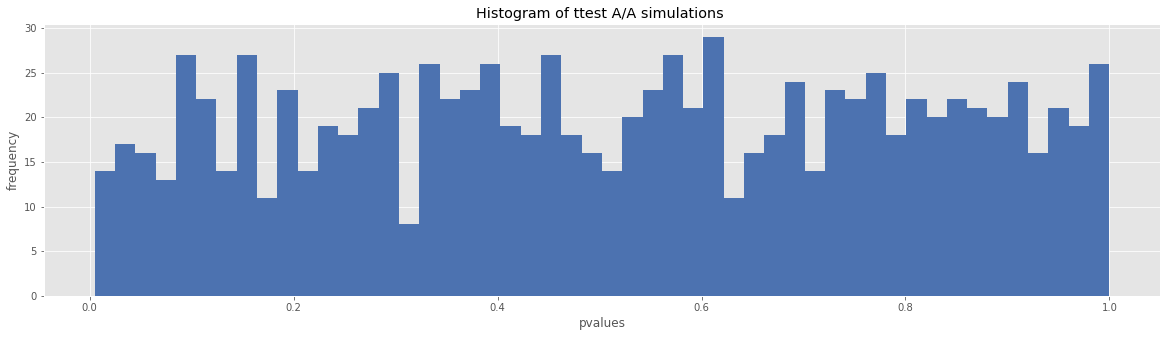

0.033

In [290]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in range(simulations):
    s1 = users.query('group == "c1"').total_revenue.sample(n_s, replace = False).values
    s2 = users.query('group == "c2"').total_revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) < 0.05) / simulations

- Сплитовалка по пользователям работает корректно, выборки репрезентативны.

***Проверим сплит систему на различия по транзакциям.***

In [291]:
# добавлю аналогичный столбец с суммой покупок в датафрейм с транзакциями.
total_value = transactions.groupby(['uid'], as_index=False).agg({'revenue':'sum'})
transactions_test = transactions.merge(total_value, on='uid', how='left')
transactions_test = transactions_test.rename(columns={"revenue_y": "total_revenue"}, errors="raise")

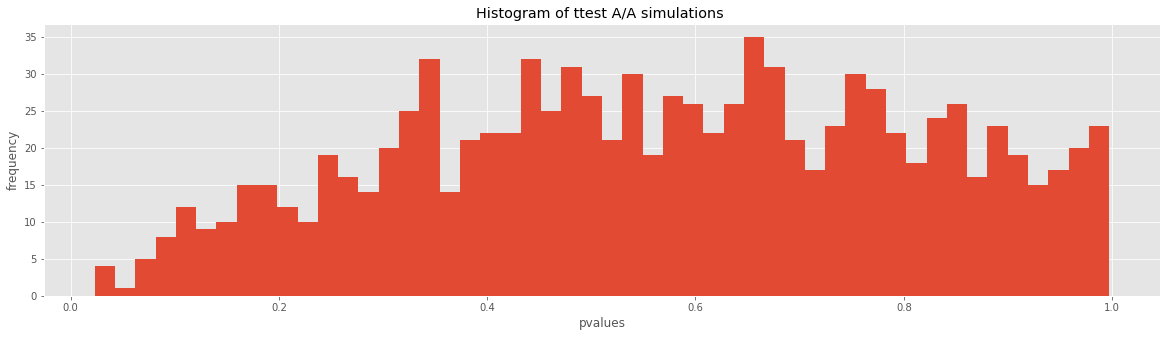

0.004

In [292]:
simulations = 1000
n_s = 150
res = []

# Запуск симуляций A/A теста
for i in range(simulations):
    s1 = transactions_test.query('group == "c1"').drop_duplicates('uid').total_revenue.sample(n_s, replace = False).values
    s2 = transactions_test.query('group == "c2"').drop_duplicates('uid').total_revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) < 0.05) / simulations

- Сплитовалка по транзакциям работает корректно, выборки репрезентативны.

**Проверим нормальность распеределений**

- Как мы уже видели по боксплотам распределения в группах не нормальны, а значит здесь имеет смысл использовать boootstrap,
  но перед этим докажем это.

In [293]:
stats.shapiro(users.query('group=="c1"').total_revenue)

ShapiroResult(statistic=0.14490318298339844, pvalue=0.0)

In [294]:
stats.shapiro(users.query('group=="c2"').total_revenue)

ShapiroResult(statistic=0.1434062123298645, pvalue=0.0)

In [295]:
stats.shapiro(users.query('group=="test"').total_revenue)

ShapiroResult(statistic=0.0992351770401001, pvalue=0.0)

Распределение не нормальное во всех группах. Следовательно можем использовать бутстрап, сформировав тем самым распределение, похожее на нормальное и посчитать доверительный интервал.

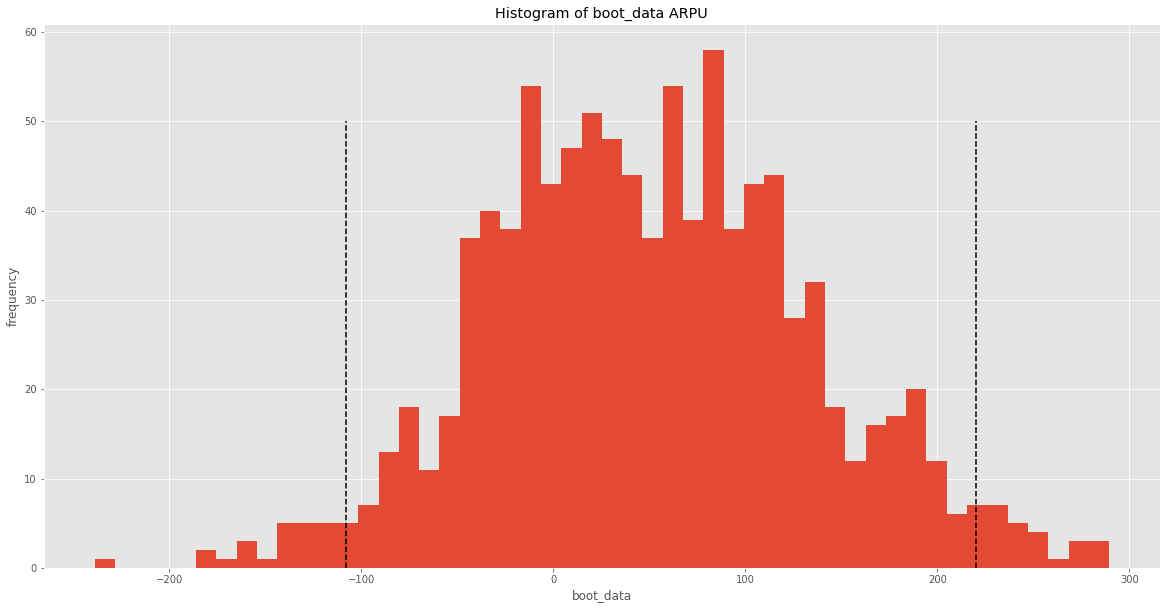

0.5406495158571221

In [313]:

С1 = users[(users['group'] == 'c1')].drop_duplicates('uid').total_revenue
test = users[(users['group'] == 'test')].drop_duplicates('uid').total_revenue
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    Control_value, # числовые значения первой выборки
    Treatment_value, # числовые значения второй выборки
    boot_it = 500, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(Control_value), len(Treatment_value)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = Control_value.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = Treatment_value.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data ARPU")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}
booted_data = get_bootstrap(test, С1, boot_it = 1000)
booted_data['p_value']

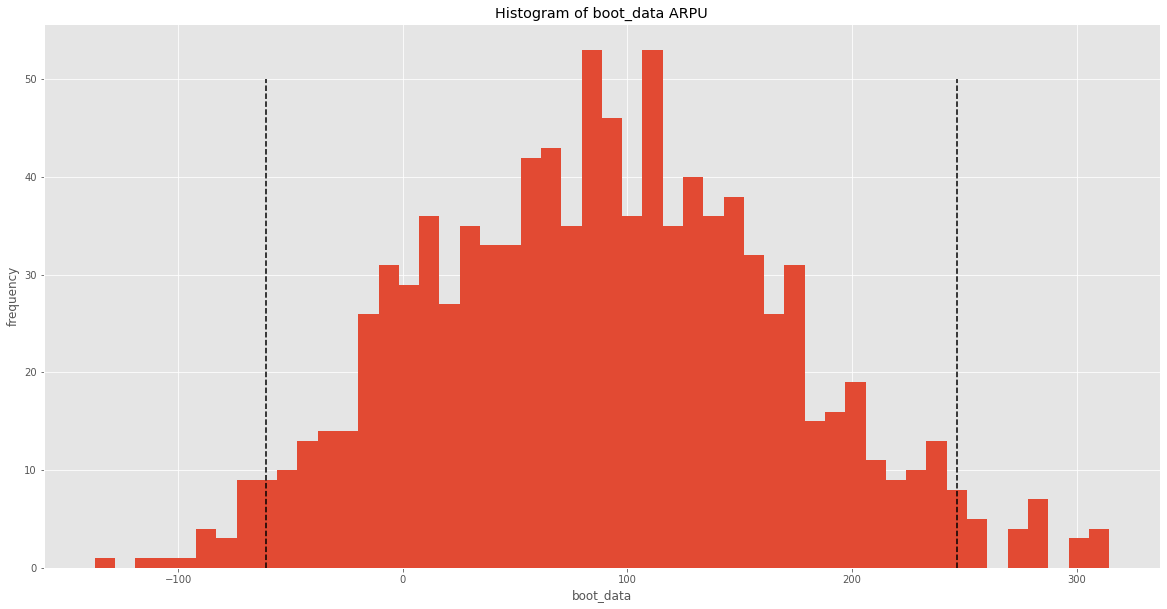

0.2652387258837704

In [314]:
С2 = users[(users['group'] == 'c2')].total_revenue
booted_data = get_bootstrap(test, С2, boot_it = 1000)
booted_data['p_value']

## Вывод для ARPU

Для общего среза пользователей мы не выходим за доверительный интервал, а значит глобально изменение не несет никакого смысла. Но можно еще найти пользователей для которых такие нововведения имеет смысл.

## Сделаем тест по ARPPU 

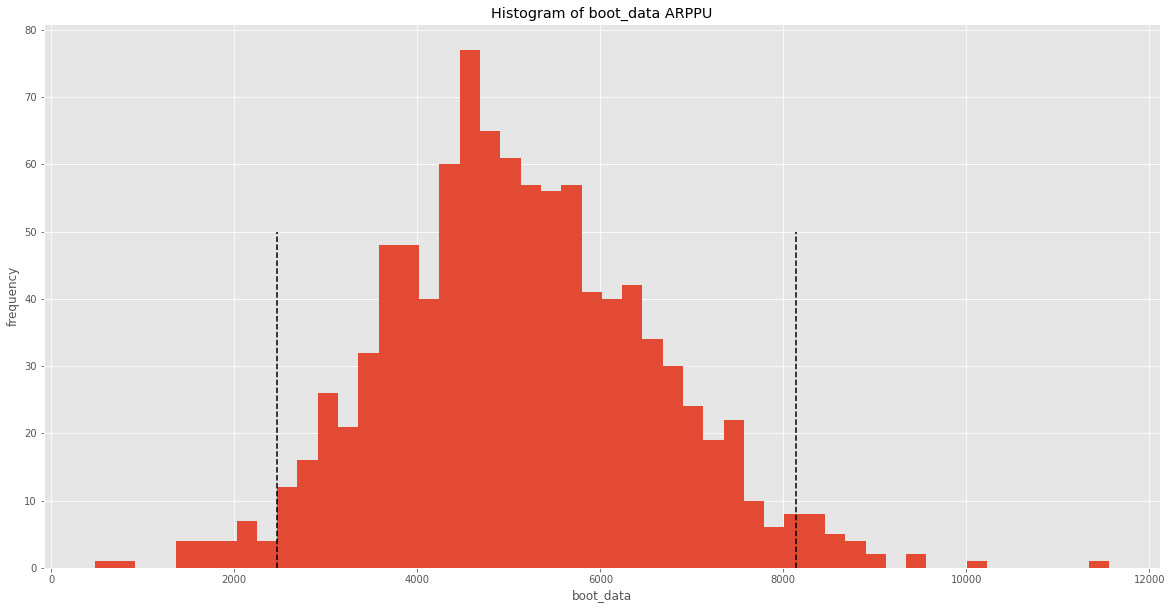

0.0004324170972149387

In [309]:
С1 = transactions_test[(transactions_test['group'] == 'c1')].drop_duplicates('uid').total_revenue
test = transactions_test[(transactions_test['group'] == 'test')].drop_duplicates('uid').total_revenue
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    Control_value, # числовые значения первой выборки
    Treatment_value, # числовые значения второй выборки
    boot_it = 500, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(Control_value), len(Treatment_value)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = Control_value.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = Treatment_value.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data ARPPU")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}
booted_data = get_bootstrap(test, С1, boot_it = 1000)
booted_data['p_value']

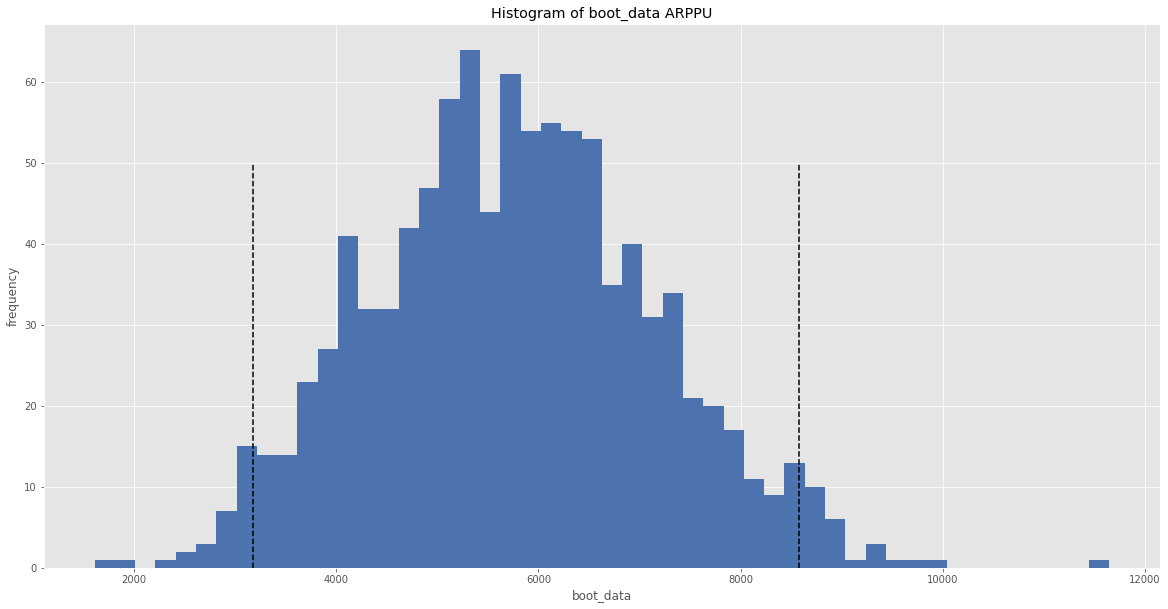

3.8125971637605814e-05

In [308]:
С2 = transactions_test[(transactions_test['group'] == 'c2')].drop_duplicates('uid').total_revenue
booted_data = get_bootstrap(test, С2, boot_it = 1000)
booted_data['p_value']

1. В ARPPU тесте доверительные интервалы выходят за 0 в обоих тестах. 
- Доход среди платящих пользователей увеличился.
- Среди этой категории пользователей новоизменение имеет смысл.

### **Найдем на кого больше всего повлияли новые изменения**

In [300]:
new_df= users.merge(transactions, on='uid', how='right')
new_df = new_df.drop_duplicates('uid')

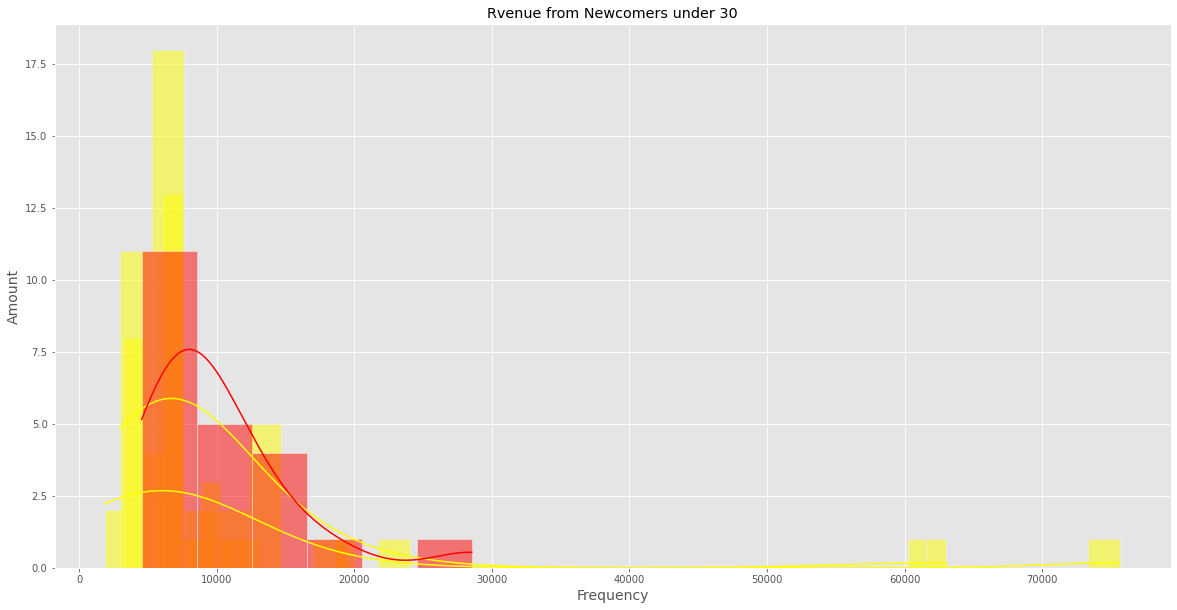

In [394]:
sns.histplot(data=new_df[(new_df['group_x'] == 'c1' )
                       & (new_df['is_premium'] == 1)
                       & (new_df['age'] < 30)
                       & (new_df['product_type'] == 'premium_no_trial')]\
                        .drop_duplicates('uid'), x = 'total_revenue', color='yellow', kde=True)
sns.histplot(data=new_df[(new_df['group_x'] == 'c2' )
                       & (new_df['is_premium'] == 1)
                       & (new_df['age'] < 30)
                       & (new_df['product_type'] == 'premium_no_trial')]\
                        .drop_duplicates('uid'), x = 'total_revenue', color='yellow', kde=True)
sns.histplot(data=new_df[(new_df['group_x'] == 'test')
                       & (new_df['is_premium'] == 1)
                       & (new_df['age'] < 30)
                       & (new_df['product_type'] == 'premium_no_trial')]\
                        .drop_duplicates('uid'), x = 'total_revenue', color='Red', kde=True).set(title='Rvenue from Newcomers under 30')
plt.rcParams['figure.figsize']=(20,10)
sns.set_palette("deep")
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Amount', fontsize=14)
sns.set_palette("deep")

***График показывает как стали платить новые пользователи до 30 лет.***

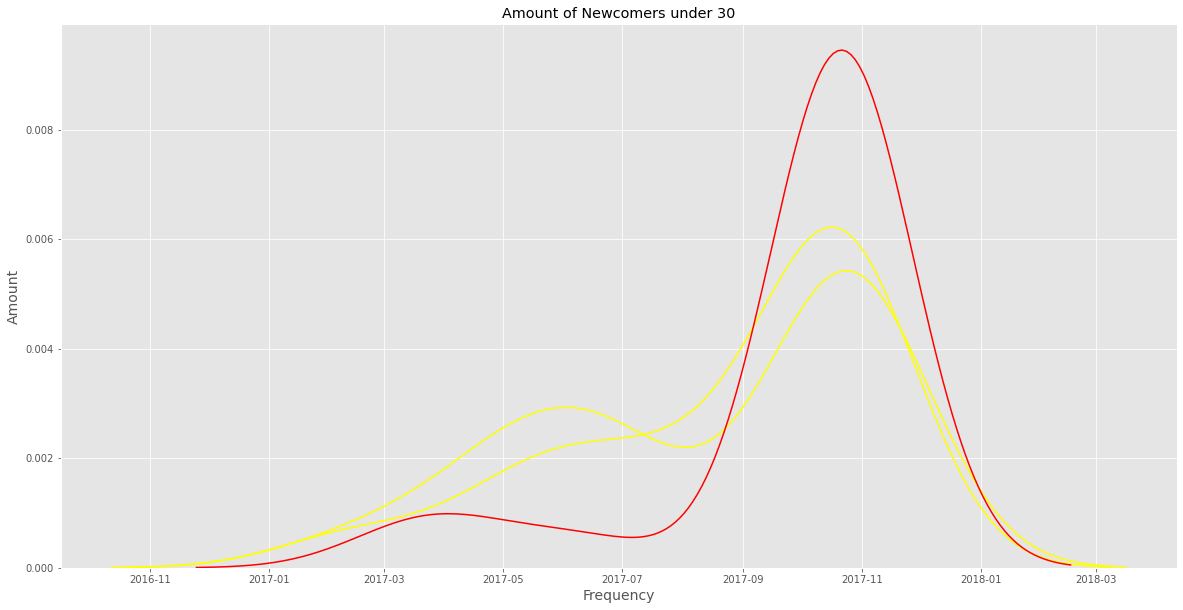

In [396]:
sns.kdeplot(data=new_df[(new_df['group_x'] == 'c1' )
                       & (new_df['is_premium'] == 1)
                       & (new_df['age'] < 30)
                       & (new_df['product_type'] == 'premium_no_trial')]\
                        .drop_duplicates('uid'), x = 'paid_at', color='yellow')
sns.kdeplot(data=new_df[(new_df['group_x'] == 'c2' )
                       & (new_df['is_premium'] == 1)
                       & (new_df['age'] < 30)
                       & (new_df['product_type'] == 'premium_no_trial')]\
                        .drop_duplicates('uid'), x = 'paid_at', color='yellow')
sns.kdeplot(data=new_df[(new_df['group_x'] == 'test')
                       & (new_df['is_premium'] == 1)
                       & (new_df['age'] < 30)
                       & (new_df['product_type'] == 'premium_no_trial')]\
                        .drop_duplicates('uid'), x = 'paid_at', color='Red').set(title='Amount of Newcomers under 30')
plt.rcParams['figure.figsize']=(20,10)
sns.set_palette("deep")
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Amount', fontsize=14)
sns.set_palette("deep")

***График показывает как стали приобретать премиум подписку новые пользователи до 30 лет в сравнении с контрольными группами.***

In [365]:
under_30 = new_df.query('age < 30').drop_duplicates('uid')

In [366]:
under_30.groupby(['group_x'], as_index=False).agg({'total_revenue':'median'})

,group_x,total_revenue
0,c1,9470.5
1,c2,6337.5
2,test,12727.0


Пользователи стали гораздо больше платить. 

In [367]:
pd.crosstab(under_30.is_premium, under_30.group_x)

group_x,c1,c2,test
is_premium,,,
0.0,20,24,4
1.0,82,70,52


In [368]:
CR = new_df.query('age < 30').groupby(['group_x'], as_index=False).agg({'uid':'count'})
CR2 = new_df.query('is_premium == 1 and age < 30').groupby(['group_x'], as_index=False).agg({'uid':'count'})
CR = CR.merge(CR2, on='group_x', how='inner')
CR['CR'] = CR.uid_y / CR.uid_x 

In [369]:
CR
# для пользователей до 30 лет конверсия в нового пользователя выросла, стал

,group_x,uid_x,uid_y,CR
0,c1,102,82,0.803922
1,c2,94,70,0.744681
2,test,56,52,0.928571


АА тест для контрольных групп среди пользователей до 30 лет.

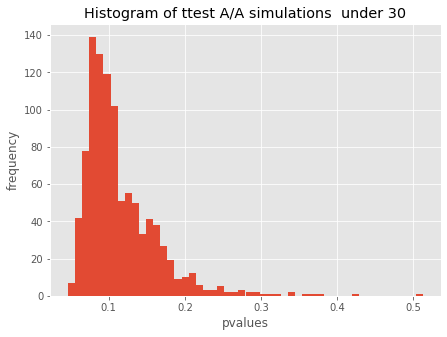

0.001

In [383]:
# в тесте сравнивается сам факт владения премиум-подпиской у нового пользователя.
n = 1000
simulations = 1000
n_s = 94
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = under_30.query('group_x == "c1"').total_revenue.sample(n_s, replace = False).values
    s2 = under_30.query('group_x == "c2"').total_revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations  under 30")
plt.show()
plt.rcParams['figure.figsize']=(7,5)
# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Бут страп по ARPPU для пользователей до 30 лет.

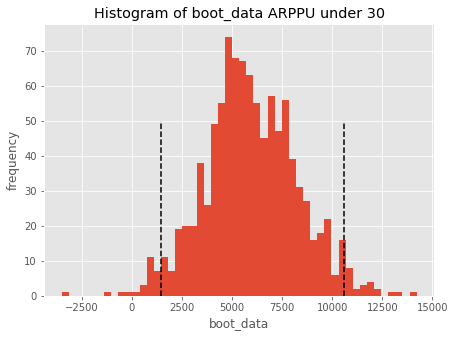

0.009157208282099177

In [391]:
C1 = under_30.query('group_x == "c1"').total_revenue
test = under_30.query('group_x == "test"').total_revenue
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    Control_value, # числовые значения первой выборки
    Treatment_value, # числовые значения второй выборки
    boot_it = 500, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(Control_value), len(Treatment_value)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = Control_value.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = Treatment_value.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data ARPPU under 30")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}
booted_data = get_bootstrap(test, C1, boot_it = 1000)
booted_data['p_value']

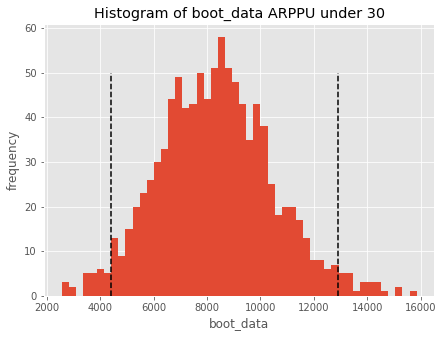

8.88670702249993e-05

In [392]:
C2 = under_30.query('group_x == "c2"').total_revenue
booted_data = get_bootstrap(test, C2, boot_it = 1000)
booted_data['p_value']

1. AA тест для группы пользователей до 30 подтвердил, что уровень ложно-положительных случаев FPR<0.05, система сплитования работает положительно.
- Бут страп по ARPPU для пользователей до 30 вышел за рамки доверительного интервала, нововведение имеет смысл.

## Выводы

- Если смотреть на изменения в целом, то эксперимент не однозначный. Наблюдается отрицательная динамика конверсии, особенно для пользователей старше 30 лет. Скорее всего имеет смысл еще подумать над нововведениями и предложить что-то, что заставит остальных пользователей так же активно приобретать премиум подписку. Такие выводы сделаны на основе того, что ARPU не дал стат значимых результатов.
- Положительная динамика была выявлена на пользователях до 30 лет, в этом сегмента выросла конверсия по сравнению с контрольными группами при условии, что рассматриваем только в этом срезе пользователей.
- Сплит система работает корректно.
- В транзакциях первой контрольной группы была неисправность в логах.
### Итог
- Нельзя запускать нововведения, ARPU не дал стат значимых результатов, среди пользователей тестовой группы упала конверсия